
# Data Cleaning and Analysis on Time Series Data

This lab consists of 8 experiments on data cleaning techniques for time series data. The dataset includes 500 records of time-based measurements. After each cleaning method, the data will be analyzed and compared to the original data to highlight the effectiveness of the cleaning process.

**Objectives:**
- Learn different methods of cleaning time series data.
- Apply and compare the effectiveness of each method.
- Visualize data before and after cleaning.


## 6610110341 สุธินันท์ รองพล

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore




# Generate synthetic time series data with 500 records
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=500, freq='H')
values = np.random.randn(500).cumsum() + 10
values[::50] = np.nan  # inject missing values
df = pd.DataFrame({'timestamp': date_range, 'value': values})
df.set_index('timestamp', inplace=True)

# Show first few rows of the data
df.head()


C:\Users\suthi\AppData\Local\Temp\ipykernel_29208\4216742757.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2023-01-01', periods=500, freq='H')


,value
timestamp,
2023-01-01 00:00:00,NaN
2023-01-01 01:00:00,10.358450
2023-01-01 02:00:00,11.006138
2023-01-01 03:00:00,12.529168
2023-01-01 04:00:00,12.295015


In [291]:
df['value'].isnull().sum()

np.int64(10)

In [292]:
df.isna().sum()

value    10
dtype: int64

In [293]:
df.isna().values.sum()

np.int64(10)

## Experiment 1: Handling Missing Values (Forward Fill)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Forward fill คือการนำค่าก่อนหน้ามาเติมแทนที่ค่า NaN ซึ่งจะไม่สามารถใช้ได้กับข้อมูลตัวแรกที่เป็น NaN เนื่องจากยังไม่มีค่าก่อนหน้าให้ใช้ในการเติม

#### Results

In [294]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Forward Fill
df_cleaned = df.copy()
df_cleaned['value'] = df['value'].fillna(method='ffill').fillna(method='bfill')

# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       500.00
1  Missing Values         10.00         0.00
2            Mean          8.67         8.64
3          Median          8.92         8.92
4         Std Dev          7.02         7.02


C:\Users\suthi\AppData\Local\Temp\ipykernel_29208\107261438.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['value'] = df['value'].fillna(method='ffill').fillna(method='bfill')


### Before vs After 

C:\Users\suthi\AppData\Local\Temp\ipykernel_29208\3105542364.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill')


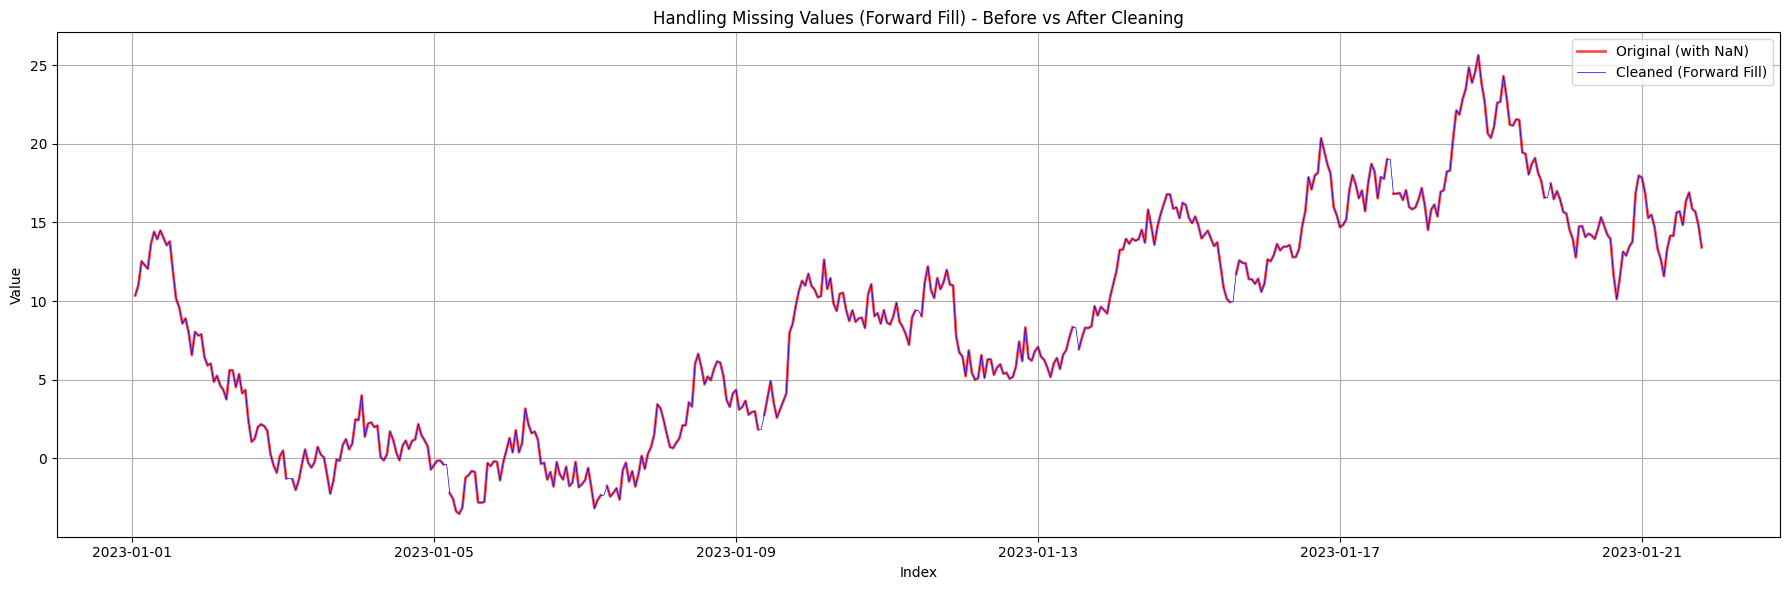

In [295]:
# Forward fill
df_cleaned = df.fillna(method='ffill')

# Plot comparison
plt.figure(figsize=(18, 6))

# Plot original with NaN gaps as dotted line or scatter
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)

# Plot cleaned as solid line
plt.plot(df_cleaned.index, df_cleaned['value'], label='Cleaned (Forward Fill)', color='blue', linewidth=0.5)

plt.legend()
plt.title("Handling Missing Values (Forward Fill) - Before vs After Cleaning")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [296]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [297]:
df_cleaned.describe()

,value
count,499.000000
mean,8.631811
std,7.028682
min,-3.526945
25%,2.020853
50%,8.899632
75%,14.442699
max,25.635646


## Experiment 2: Handling Missing Values (Interpolation)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Interpolation คือ วิธีการจัดการกับค่าที่หายไป (missing values) โดย คาดการณ์ค่าที่หายไป จากค่าที่อยู่ก่อนหน้าและหลังหน้าของมัน

- Linear Interpolation – คำนวณเส้นตรงระหว่าง 2 จุด (นิยมใช้)

- Polynomial Interpolation – ใช้สมการพหุนาม (เหมาะกับกราฟโค้ง)

- Spline Interpolation – ใช้หลายๆ เส้นโค้งเชื่อมจุดให้เรียบ

- Time-based Interpolation – สำหรับข้อมูล time-series โดยคำนึงถึงระยะเวลาระหว่างจุด

### Result

In [298]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Interpolation
df_cleaned = df.copy()
df_cleaned['value'] = df_cleaned['value'].interpolate(method='linear')

# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       499.00
1  Missing Values         10.00         1.00
2            Mean          8.67         8.63
3          Median          8.92         8.90
4         Std Dev          7.02         7.03


### Before vs After 

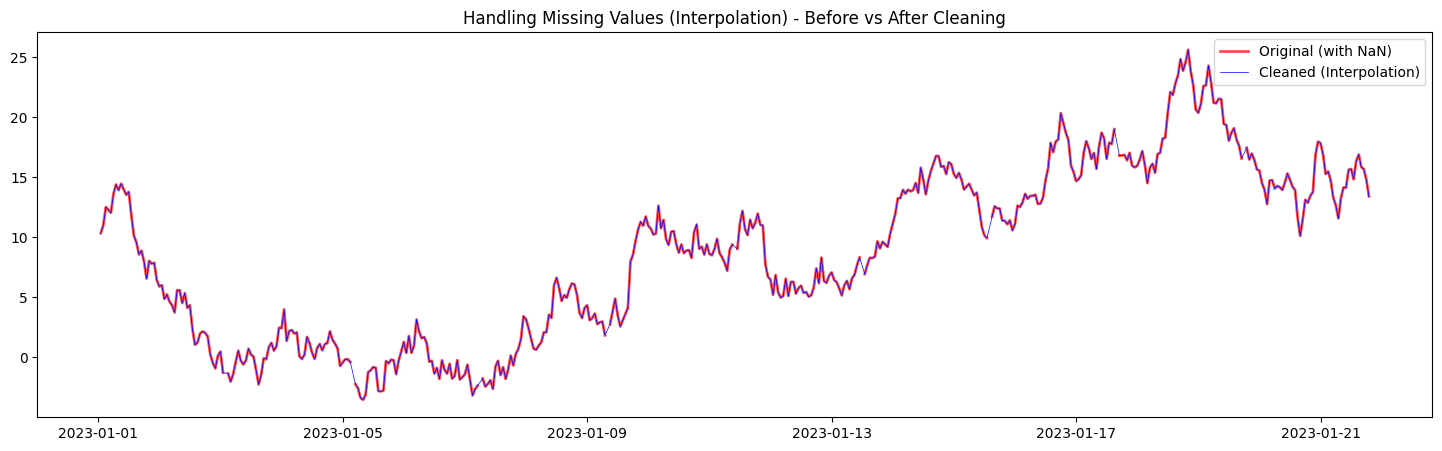

In [299]:

# Handling Missing Values (Interpolation)
df_cleaned = df.interpolate()

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Cleaned (Interpolation)', color='blue', linewidth=0.5)
plt.legend()
plt.title("Handling Missing Values (Interpolation) - Before vs After Cleaning")
plt.show()


In [300]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [301]:
df_cleaned.describe()

,value
count,499.000000
mean,8.630179
std,7.027972
min,-3.526945
25%,2.064535
50%,8.899632
75%,14.442699
max,25.635646


## Experiment 3: Removing Duplicates
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Removing Duplicates คือวิธีการ ลบข้อมูลซ้ำ (Duplicate Records) ออกจากชุดข้อมูล โดยมักใช้เมื่อตรวจพบว่าแถวข้อมูลบางแถวในตารางมีค่าซ้ำกันทุกช่องหรือซ้ำเฉพาะบางคอลัมน์ที่กำหนดไว้

### Result

In [302]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Removing Duplicates
df_cleaned = df.copy()
df_cleaned['value'] = df_cleaned['value'].drop_duplicates()

# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       490.00
1  Missing Values         10.00        10.00
2            Mean          8.67         8.67
3          Median          8.92         8.92
4         Std Dev          7.02         7.02


### Before vs After

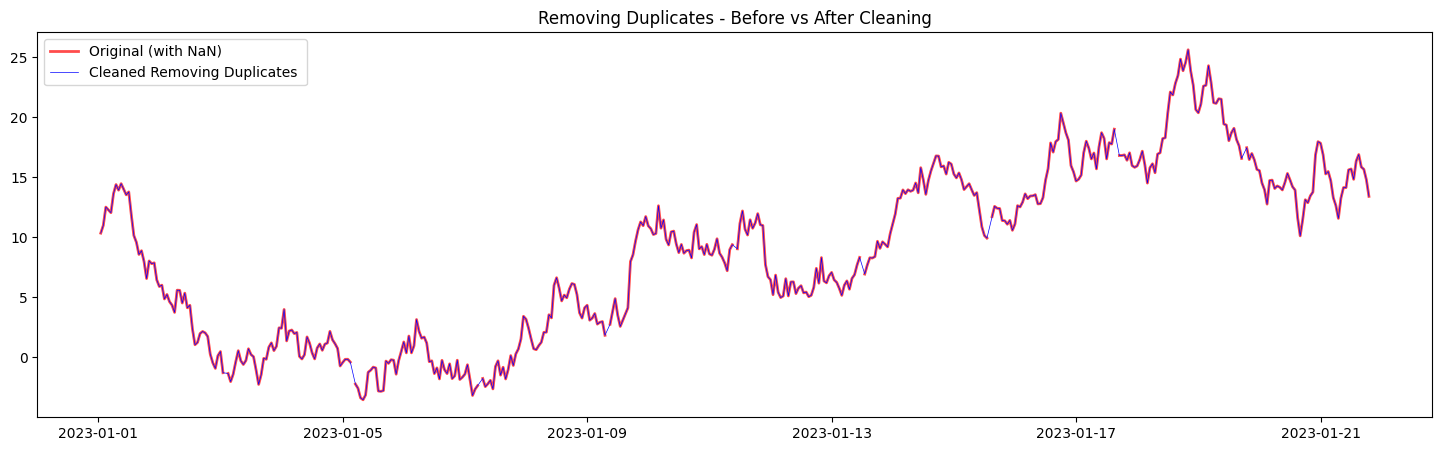

In [303]:

# Removing Duplicates
df_cleaned = df.drop_duplicates()

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Cleaned Removing Duplicates ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Removing Duplicates - Before vs After Cleaning")
plt.show()


In [304]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [305]:
df_cleaned.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


## Experiment 4: Outlier Detection and Removal (Z-score)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Outlier Detection and Removal (Z-score)
คือวิธีการตรวจจับและลบ "ค่าผิดปกติ (Outliers)" ออกจากชุดข้อมูล โดยอาศัย Z-score ซึ่งเป็นการวัดว่าค่าหนึ่งๆ ห่างจากค่าเฉลี่ย (mean) ไปกี่ส่วนเบี่ยงเบนมาตรฐาน (standard deviations)

### Result

In [306]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# zscore
df_cleaned = df.copy()
z_scores = zscore(df_cleaned['value'])
abs_z_scores = np.abs(z_scores)
df_cleaned = df[(abs_z_scores < 3)]

# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00          0.0
1  Missing Values         10.00          0.0
2            Mean          8.67          NaN
3          Median          8.92          NaN
4         Std Dev          7.02          NaN


### Before vs After

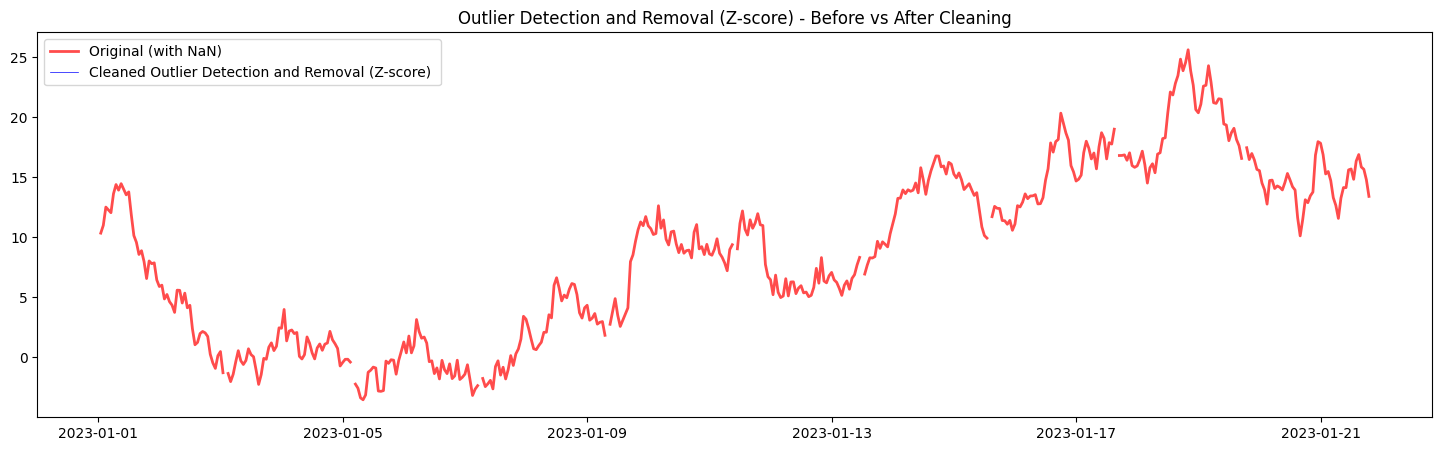

In [307]:

# Outlier Detection and Removal (Z-score)
z_scores = zscore(df['value'])
abs_z_scores = np.abs(z_scores)
df_cleaned = df[(abs_z_scores < 3)]

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Cleaned Outlier Detection and Removal (Z-score) ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Outlier Detection and Removal (Z-score) - Before vs After Cleaning")
plt.show()


In [308]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [309]:
df_cleaned.describe()

,value
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## Experiment 5: Outlier Detection and Removal (IQR)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Outlier Detection and Removal (IQR) คือวิธีการตรวจจับและลบ "ค่าผิดปกติ (Outliers)" ออกจากชุดข้อมูล โดยอิงจาก ช่วงระหว่างควอไทล์ (Interquartile Range - IQR) ซึ่งเป็นวิธีที่นิยมใช้มาก โดยเฉพาะกับข้อมูลที่อาจมีการกระจายแบบไม่เป็นปกติ (skewed data)

### Result

In [310]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Outlier Detection and Removal (IQR)
df_cleaned = df.copy()
Q1 = df_cleaned['value'].quantile(0.25)
Q3 = df_cleaned['value'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['value'] >= Q1 - 1.5 * IQR) & (df['value'] <= Q3 + 1.5 * IQR)]


# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       490.00
1  Missing Values         10.00         0.00
2            Mean          8.67         8.67
3          Median          8.92         8.92
4         Std Dev          7.02         7.02


### Before vs After

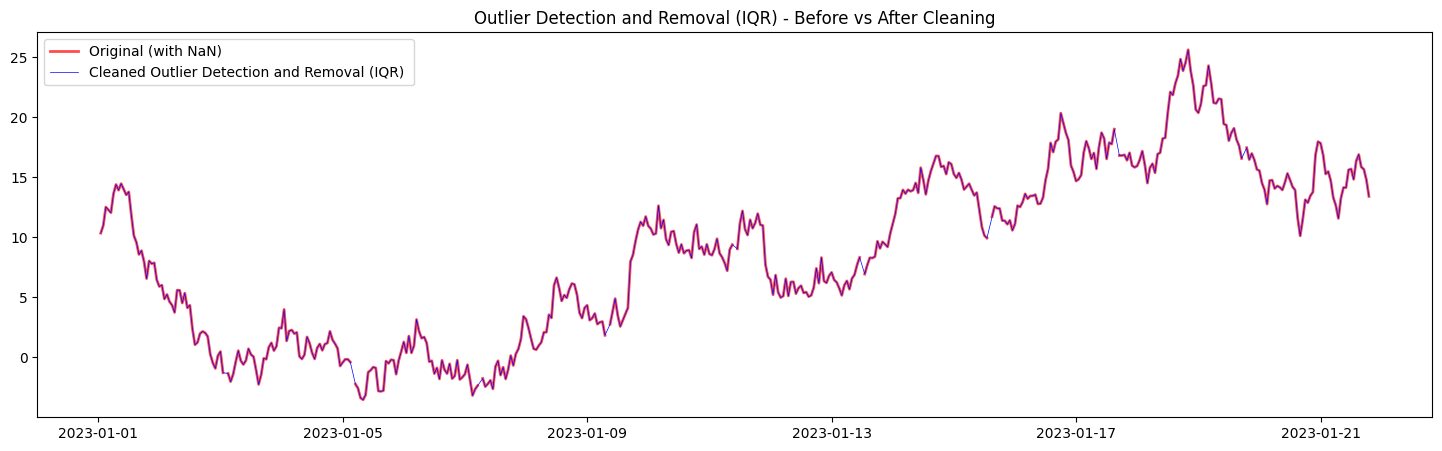

In [311]:

# Outlier Detection and Removal (IQR)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['value'] >= Q1 - 1.5 * IQR) & (df['value'] <= Q3 + 1.5 * IQR)]

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Cleaned Outlier Detection and Removal (IQR) ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Outlier Detection and Removal (IQR) - Before vs After Cleaning")
plt.show()


In [312]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [313]:
df_cleaned.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


## Experiment 6: Smoothing Using Rolling Mean
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Smoothing Using Rolling Mean (การทำให้ข้อมูลเรียบด้วยค่าเฉลี่ยเคลื่อนที่) คือเทคนิคในการปรับข้อมูลให้นุ่มนวลขึ้นโดยการแทนค่าทุกจุดข้อมูลด้วยค่าเฉลี่ยของข้อมูลในช่วงเวลาที่กำหนด (เรียกว่า "หน้าต่าง" หรือ window) รอบจุดนั้น

### Result

In [314]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Smoothing Using Rolling Mean
df_cleaned = df.copy(); df_cleaned['value'] = df_cleaned['value'].rolling(window=5).mean()


# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       450.00
1  Missing Values         10.00        50.00
2            Mean          8.67         8.77
3          Median          8.92         9.03
4         Std Dev          7.02         6.93


### Before vs After

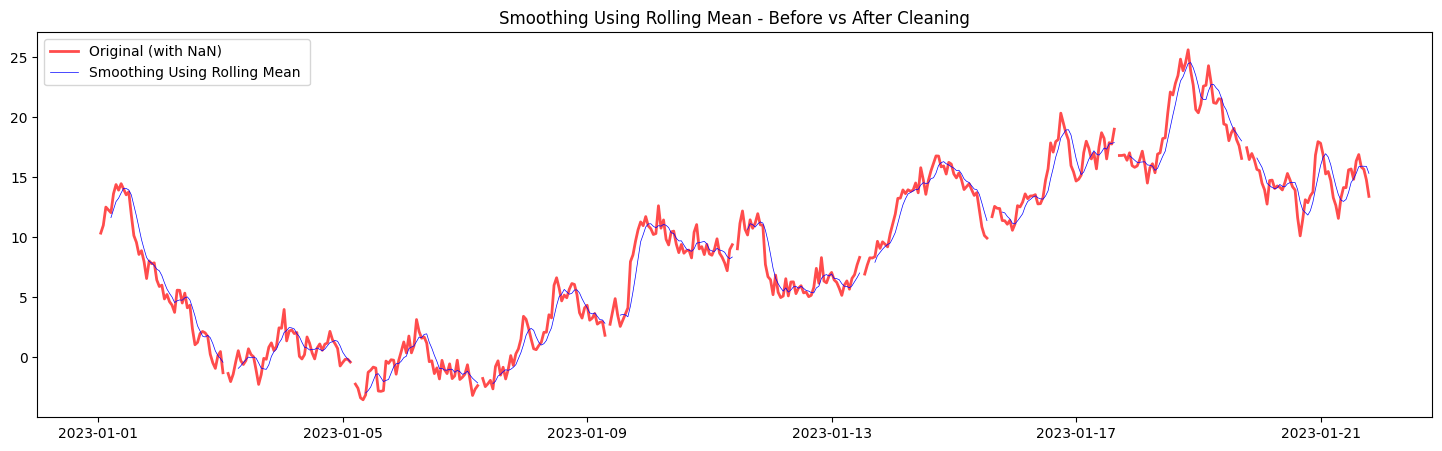

In [315]:

# Smoothing Using Rolling Mean
df_cleaned = df.copy(); df_cleaned['value'] = df_cleaned['value'].rolling(window=5).mean()

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Smoothing Using Rolling Mean ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Smoothing Using Rolling Mean - Before vs After Cleaning")
plt.show()


In [316]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [317]:
df_cleaned.describe()

,value
count,450.000000
mean,8.774446
std,6.932714
min,-2.959910
25%,1.990919
50%,9.026088
75%,14.484756
max,24.567407


## Experiment 7: Normalization (Min-Max Scaling)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Normalization (Min-Max Scaling) คือวิธีการแปลงค่าตัวเลขในชุดข้อมูลให้อยู่ในช่วงมาตรฐาน เช่น [0, 1] 

### Result

In [318]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Normalization (Min-Max Scaling)
df_cleaned = df.copy()
df_cleaned['value'] = (df['value'] - df['value'].min()) / (df['value'].max() - df['value'].min())


# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00       490.00
1  Missing Values         10.00        10.00
2            Mean          8.67         0.42
3          Median          8.92         0.43
4         Std Dev          7.02         0.24


### Before vs After

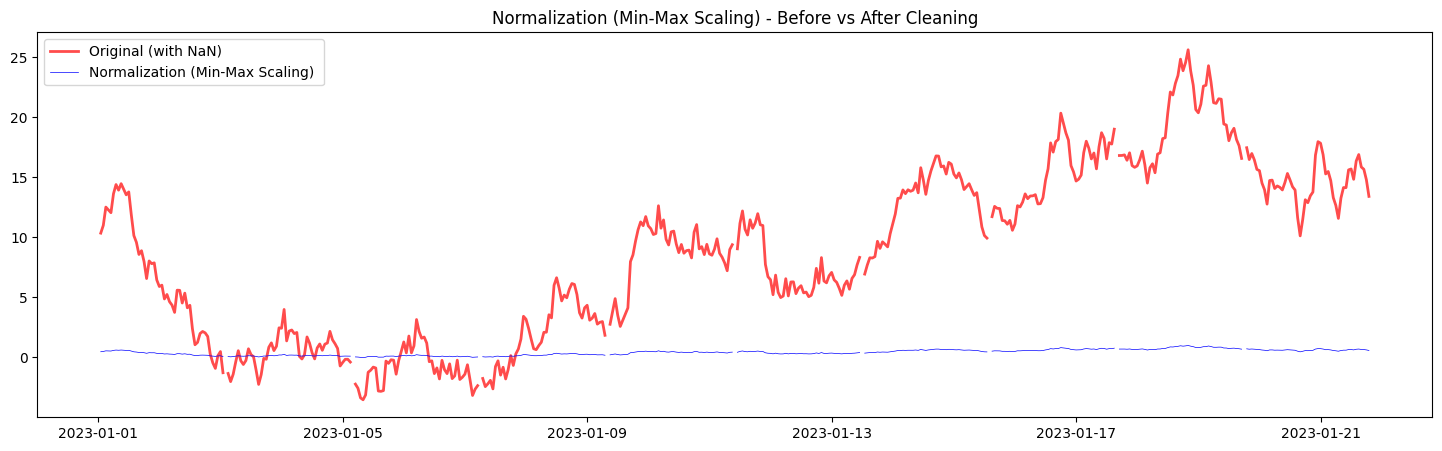

In [319]:

# Normalization (Min-Max Scaling)
df_cleaned = df.copy()
df_cleaned['value'] = (df['value'] - df['value'].min()) / (df['value'].max() - df['value'].min())

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Normalization (Min-Max Scaling) ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Normalization (Min-Max Scaling) - Before vs After Cleaning")
plt.show()


In [320]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [321]:
df_cleaned.describe()

,value
count,490.000000
mean,0.418090
std,0.240640
min,0.000000
25%,0.192381
50%,0.426895
75%,0.616791
max,1.000000


## Experiment 8: Resampling (Downsampling to Daily Frequency)
Apply the method and compare the cleaned data with the original.

### Method Explanation:

Resampling (Downsampling to Daily Frequency) คือกระบวนการในการปรับความละเอียดของข้อมูลเวลา (time series) ให้ ลดลง โดยการ รวมข้อมูลหลายจุดในช่วงเวลาสั้น ๆ ให้กลายเป็นค่าตัวแทนในช่วงเวลาที่ยาวขึ้น เช่น จากระดับ ชั่วโมง → วัน หรือ นาที → วัน


### Result

In [322]:
# Data Before clean
record_count_before = len(df.dropna())
missing_before = df['value'].isna().sum()
data_before = df['value']
mean_before = data_before.mean()
median_before = data_before.median()
std_before = data_before.std()

# Resampling (Downsampling to Daily Frequency)
df_cleaned = df.copy()
df_cleaned = df.resample('D').mean()

# Data After clean
record_count_after = len(df_cleaned.dropna())
missing_after = df_cleaned['value'].isna().sum()
data_after = df_cleaned['value']
mean_after = data_after.mean()
median_after = data_after.median()
std_after = data_after.std()

# Result
summary = pd.DataFrame({
    'Metric': ['Record Count', 'Missing Values', 'Mean', 'Median', 'Std Dev'],
    'Before Clean': [record_count_before, missing_before, mean_before, median_before, std_before],
    'After Clean': [record_count_after, missing_after, mean_after, median_after, std_after]
})
print("=============== Data Summary ===============")
print(summary.round(2))

=============== Data Summary ===============
           Metric  Before Clean  After Clean
0    Record Count        490.00        21.00
1  Missing Values         10.00         0.00
2            Mean          8.67         8.70
3          Median          8.92         9.65
4         Std Dev          7.02         6.92


### Before vs After

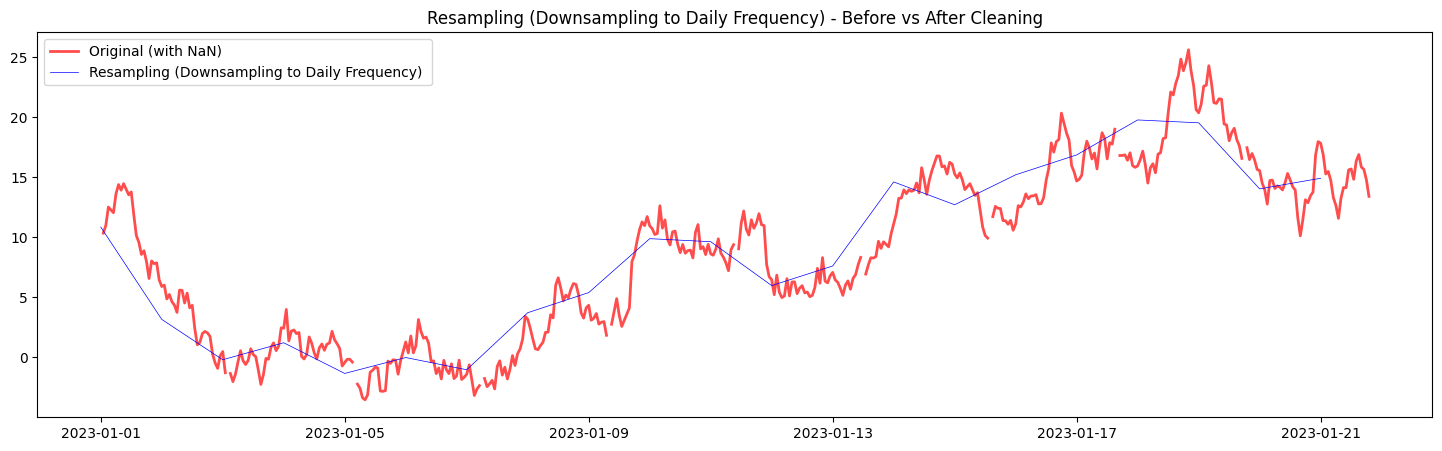

In [323]:

# Resampling (Downsampling to Daily Frequency)
df_cleaned = df.resample('D').mean()

# Plot comparison
plt.figure(figsize=(18, 5))
plt.plot(df.index, df['value'], label='Original (with NaN)', color='red', alpha=0.7, linewidth=2)
plt.plot(df_cleaned.index, df_cleaned['value'], label='Resampling (Downsampling to Daily Frequency) ', color='blue', linewidth=0.5)
plt.legend()
plt.title("Resampling (Downsampling to Daily Frequency) - Before vs After Cleaning")
plt.show()


In [324]:
df.describe()

,value
count,490.000000
mean,8.665631
std,7.017692
min,-3.526945
25%,2.083398
50%,8.922418
75%,14.460285
max,25.635646


In [325]:
df_cleaned.describe()

,value
count,21.000000
mean,8.702430
std,6.915278
min,-1.331909
25%,3.170429
50%,9.645233
75%,14.623208
max,19.789723
